# Analisis exploratorio segunda fase

En esta fase del analisis exploratorio y dado que en el proyecto se hace necesario comprobar si es realmente el algoritmo K-means es realmente el indicado, (idea inicial del proyecto) haremos un <u>analisis de componentes principales (PCA) </u>  con la finalidad de reducir los datos a 2 dimensiones y ver si estos cumplen con lo que estamos buscando 

In [1]:
# Cargamos las librerias con las que trabajaremos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Vista inicial de los datos
df_customer = pd.read_csv("dataset/new_shopping_trends.csv")
df_customer.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Dado que ya decidimos que vamos a aplicar el algoritmo de analisis de componentes principales para visualizar nuestros datos vamos primeramente a preparar los datos para dicho analisis

In [2]:
# Identificamos las columnas categóricas y numéricas
categorical_cols = df_customer.select_dtypes(include=['object']).columns
numeric_cols = df_customer.select_dtypes(include=['int64', 'float64']).columns

Para codificar las variables categóricas usaremos One-Hot Encoding  y el metodo de pandas pd.get_dummies para crear nuevas columnas binarias para cada categoría junto con el metodo .drop_first=True que usaremos para evitar la multicolinealidad.

In [3]:
# Codificamos las variables categoricas
df_encoded = pd.get_dummies(df_customer, columns=categorical_cols, drop_first=True)

Ahora estandarizamos los datos para que tengan una media de 0 y una desviación estándar de 1 que es crucial para el PCA

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

Aplicamos el algoritmo de analisis de componentes principales PCA

In [5]:
pca = PCA()
pca.fit(df_scaled)

PCA()

Veamos cuanta información (varianza) de los datos originales es capturada por cada componente principal.

In [6]:
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance)

Varianza explicada por cada componente principal:
[2.28799414e-02 1.84941066e-02 1.63215986e-02 1.17876985e-02
 1.14183718e-02 1.09479781e-02 1.08247735e-02 1.05887148e-02
 1.04146558e-02 1.02470353e-02 1.01078282e-02 1.00828511e-02
 1.00632960e-02 1.00346142e-02 9.87547080e-03 9.83731291e-03
 9.70545888e-03 9.58843231e-03 9.54365358e-03 9.42667837e-03
 9.39167757e-03 9.34940686e-03 9.29703815e-03 9.28004821e-03
 9.15665445e-03 9.13493093e-03 9.11542344e-03 9.02792105e-03
 9.01550173e-03 8.94579447e-03 8.89966442e-03 8.81372085e-03
 8.80936565e-03 8.68426641e-03 8.64651206e-03 8.60535738e-03
 8.58078744e-03 8.50782053e-03 8.49330867e-03 8.46096907e-03
 8.45468772e-03 8.37884660e-03 8.35338582e-03 8.27613374e-03
 8.23722881e-03 8.20061348e-03 8.19608330e-03 8.15418853e-03
 8.14250360e-03 8.10089163e-03 8.08783195e-03 8.02681886e-03
 7.95269706e-03 7.94951635e-03 7.92007849e-03 7.86754561e-03
 7.84359140e-03 7.82065102e-03 7.78761807e-03 7.73656566e-03
 7.71081430e-03 7.66183918e-03 7.64

Ahora veamos la visualizacion de la varianza explicada para decidir el numero de componentes para plotear la varianza acumulada, esta nos ayuda a decidir cuántos componentes  son necesarios para retener una cantidad significativa de información (ej. 90%).

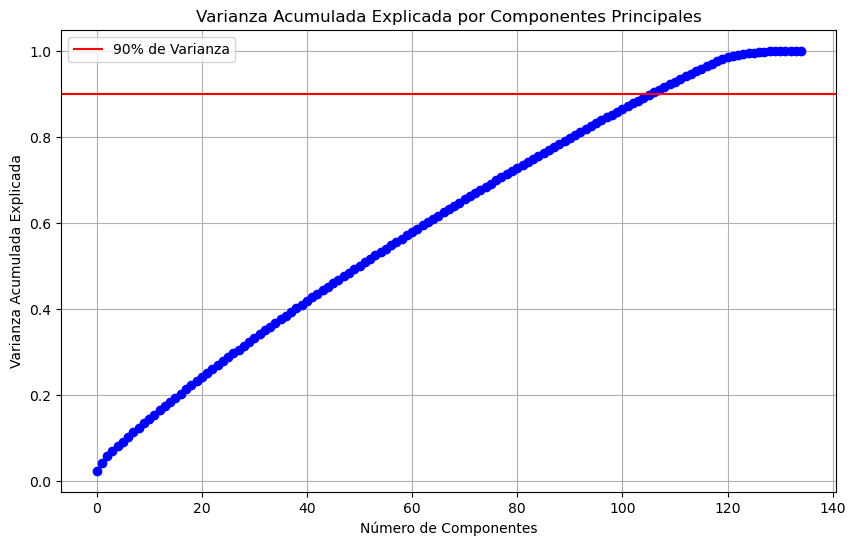

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='blue')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.axhline(y=0.90, color='red', linestyle='-', label='90% de Varianza')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Ahora aplicamos PCA de nuevo, pero esta vez pidiendole solo los 2 primeros componentes para poder graficar los datos en 2D.

In [8]:
pca_2d = PCA(n_components=2)
principal_components = pca_2d.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(df_pca.head())

        PC1       PC2
0  2.065916  1.549379
1  2.140115  1.658765
2  2.426928  1.673537
3  2.147694 -2.107582
4  2.126735  1.546412


Finalmente, visualicemos los datos en un scatter plot usando los 2 componentes

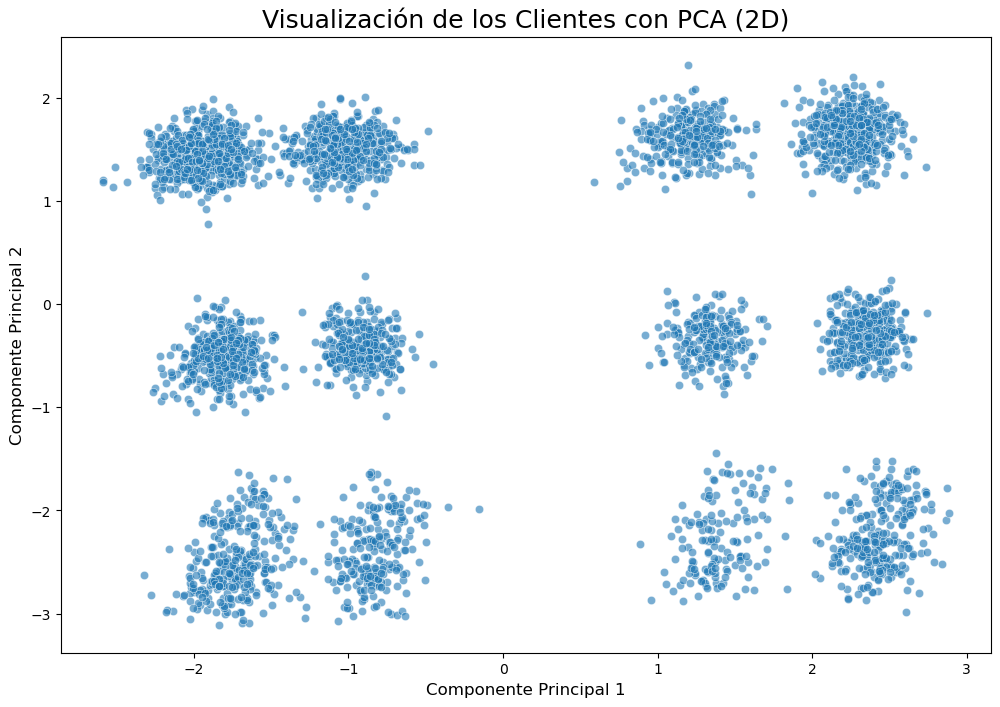

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, alpha=0.6)
plt.title('Visualización de los Clientes con PCA (2D)', fontsize=18)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.show()

Ahora hagamos una visualización con colores basados en una variable categorica (por ejemplo 'Gender') puede dar una idea de si esta variable es importante para la separación.


# Visualización de Clientes por Género


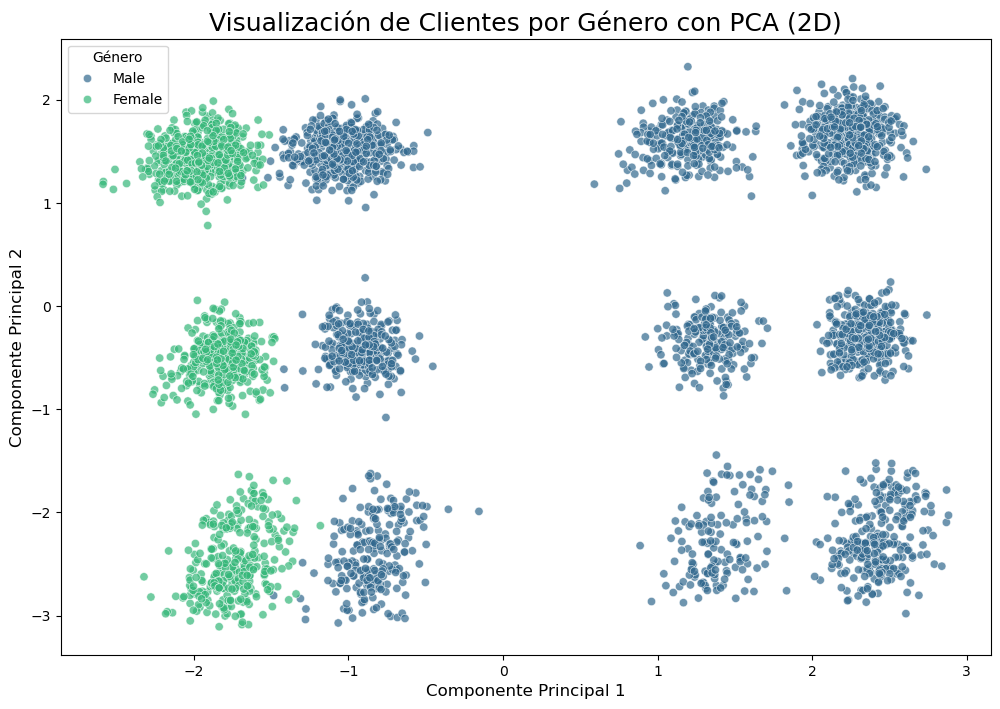

In [10]:
# La visualización con colores basados en una variable categórica (ej. 'Gender')
# puede dar una idea de si esta variable es importante para la separación.
print("\n# Visualización de Clientes por Género")
plt.figure(figsize=(12, 8))
# Recuperamos la columna original 'Gender' antes de la codificación para la visualización
sns.scatterplot(x='PC1', y='PC2', data=df_pca, hue=df_customer['Gender'], palette='viridis', alpha=0.7)
plt.title('Visualización de Clientes por Género con PCA (2D)', fontsize=18)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Género')
plt.show()

Quiero mencionar que en la carpeta del proyecto hay una subcarpeta llamada 4-Mates_proyectos y en ella hay una subcarpeta dedicada enteramente al Analisis de Componentes Principales PCA donde se da una explicacion del algoritmo y se complementa a la perfeccion con este jupiter y le agrega mas explicaciones en detalle recomiendo por ende, verla si o si

<u>A modo de conclusion: </u>

Podemos afirmar con confianza que el algoritmo K-Means si es optimo y una eleccion muy prometedora para el proyecto que estoy realizando

La visualizacion con PCA me ha proporcionado la evidencia que necesitaba para tomar esta decision. Aunque la varianza explicada en 2D era baja, la presencia de clusters visualmente definidos demuestra que los patrones de segmentación existen y son detectables.